In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r'dataset.xls')
df.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat
0,1,kolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1.000.001 - 1.250.000
1,2,hiperlipidemia,laboratorium,garut,laboratorium,dokter umum,250.001 - 500.000
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,<100.000
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,<100.000
4,5,pemeriksaan,laboratorium,garut,laboratorium,dokter umum,500.001 - 750.000


In [3]:
df.head(10)

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat
0,1,kolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1.000.001 - 1.250.000
1,2,hiperlipidemia,laboratorium,garut,laboratorium,dokter umum,250.001 - 500.000
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,<100.000
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,<100.000
4,5,pemeriksaan,laboratorium,garut,laboratorium,dokter umum,500.001 - 750.000
5,6,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,100.000 - 250.000
6,7,pemeriksaan,rumah sakit,bandung,rs borromeus,dokter umum,500.001 - 750.000
7,8,syaraf,rumah sakit,bandung,rs borromeus,spesialis saraf (neurologi),1.000.001 - 1.250.000
8,9,jantung,rumah sakit,bandung,rs borromeus,spesialis penyakit dalam,1.750.001 - 2.000.000
9,10,pemeriksaan,rumah sakit,bandung,rs borromeus,dokter umum,3.000.001 - 3.250.000


In [4]:
df.tail()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat
95,96,hipertensi,rumah sakit,bandung,rs santo barromeus,dokter umum,250.001 - 500.000
96,97,jantung,rumah sakit,bandung,rs santo barromeus,dokter umum,1.750.001 - 2.000.000
97,98,hipertensi,poliklinik,garut,klinik pratama sinergi lisna medika 03,dokter umum,250.001 - 500.000
98,99,cek lab,rumah sakit,bandung,rs santo barromeus,dokter umum,1.000.001 - 1.250.000
99,100,hiperlipidemia,poliklinik,garut,klinik pratama sinergi lisna medika 03,dokter umum,250.001 - 500.000


In [7]:
df.dtypes


,0
no,int64
diagnosa,object
institusi,object
area,object
rumah,object
tipe,object
biaya_berobat,object


# **UNIVARIATE ANALYSIS**
Menganalisis tiap masing - masing fitur secara individu

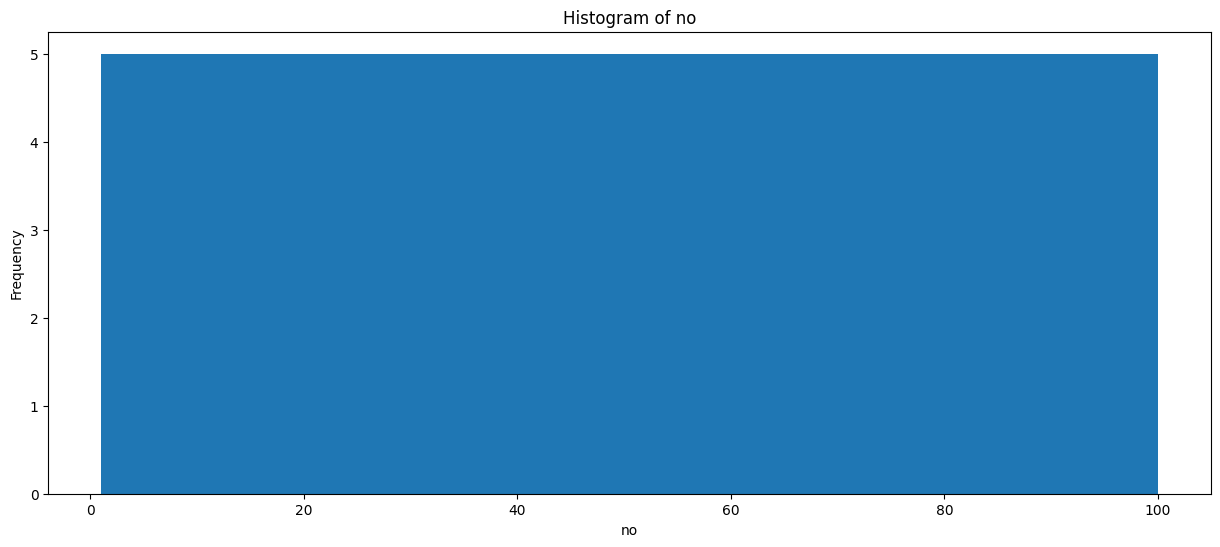

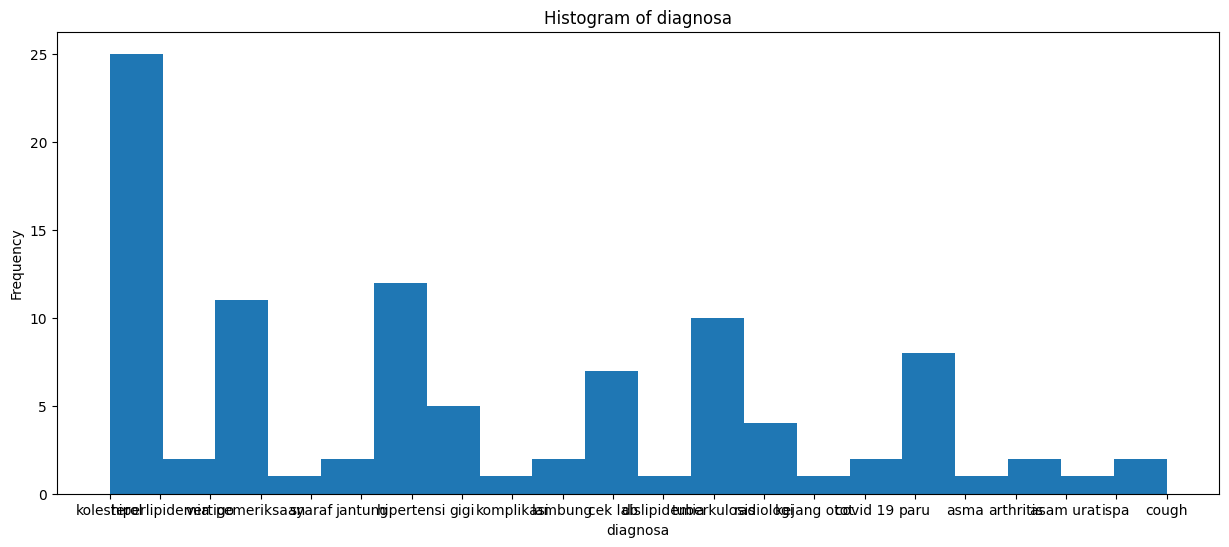

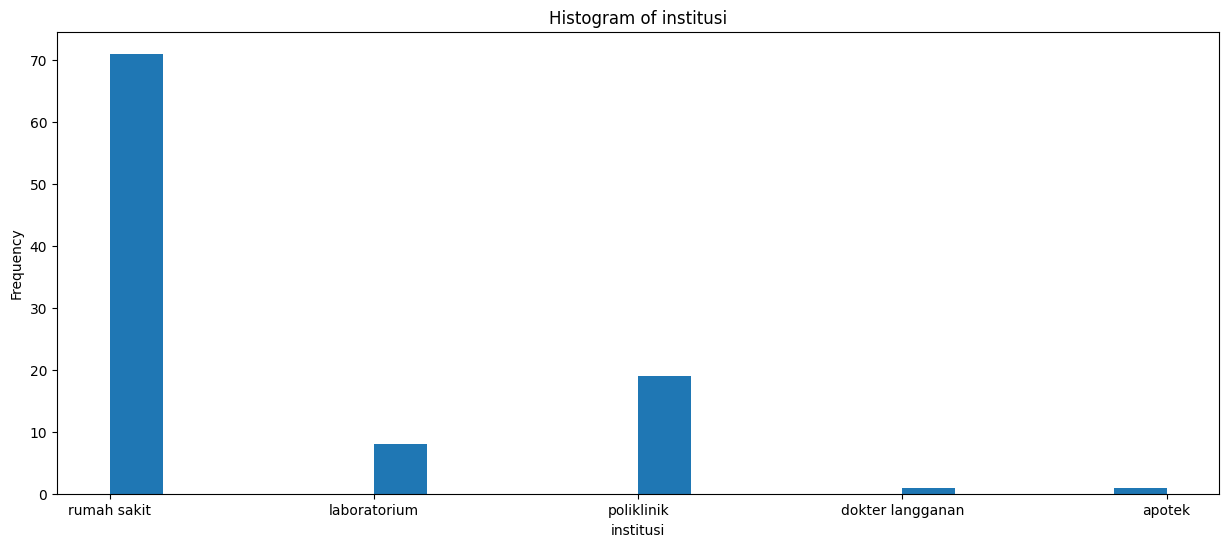

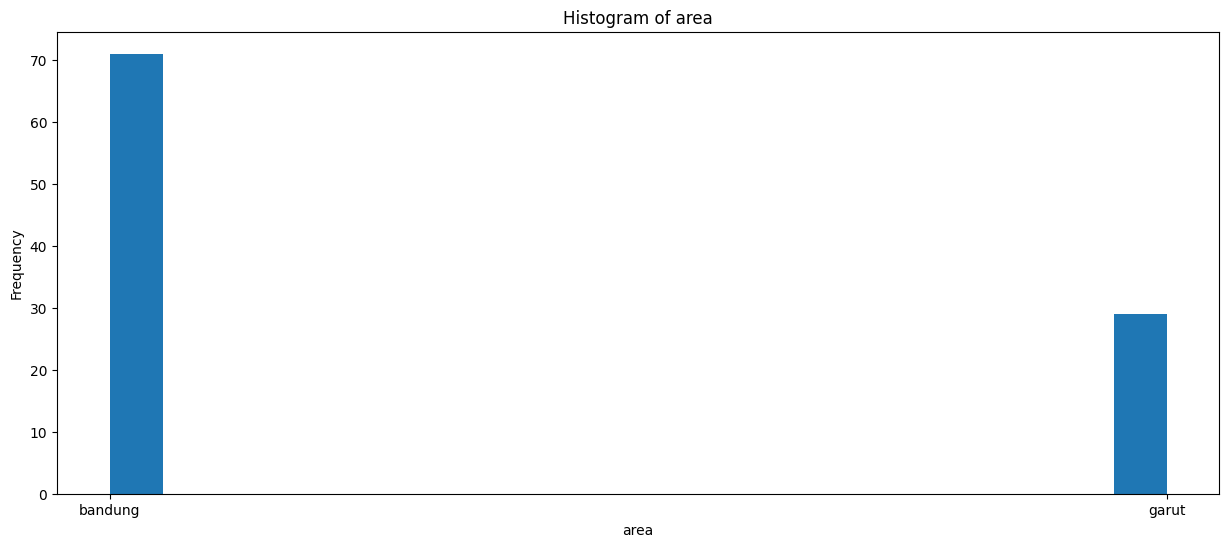

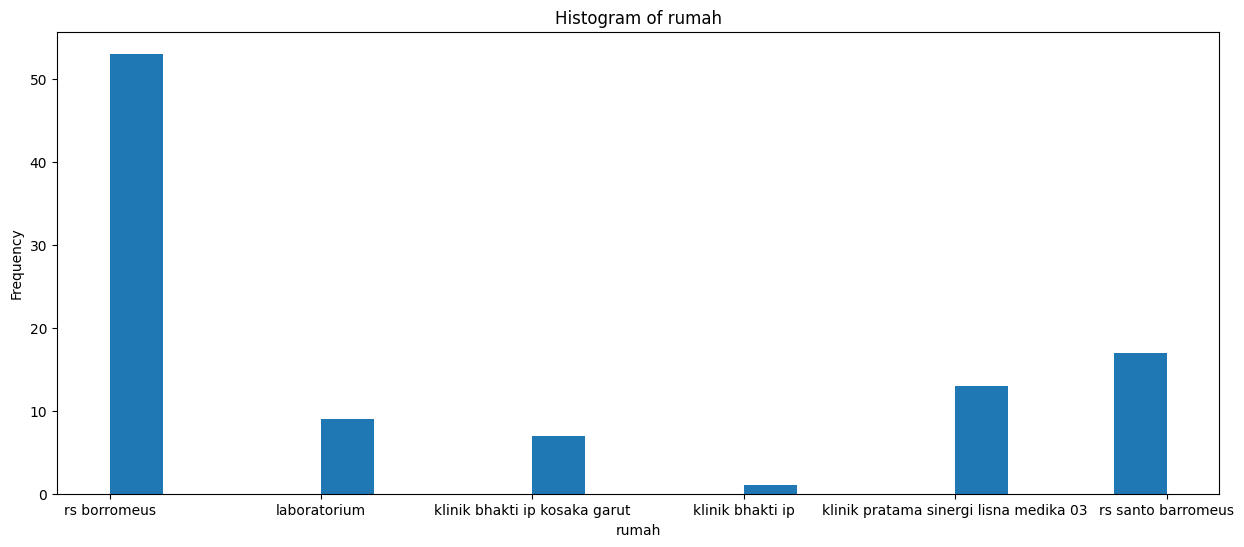

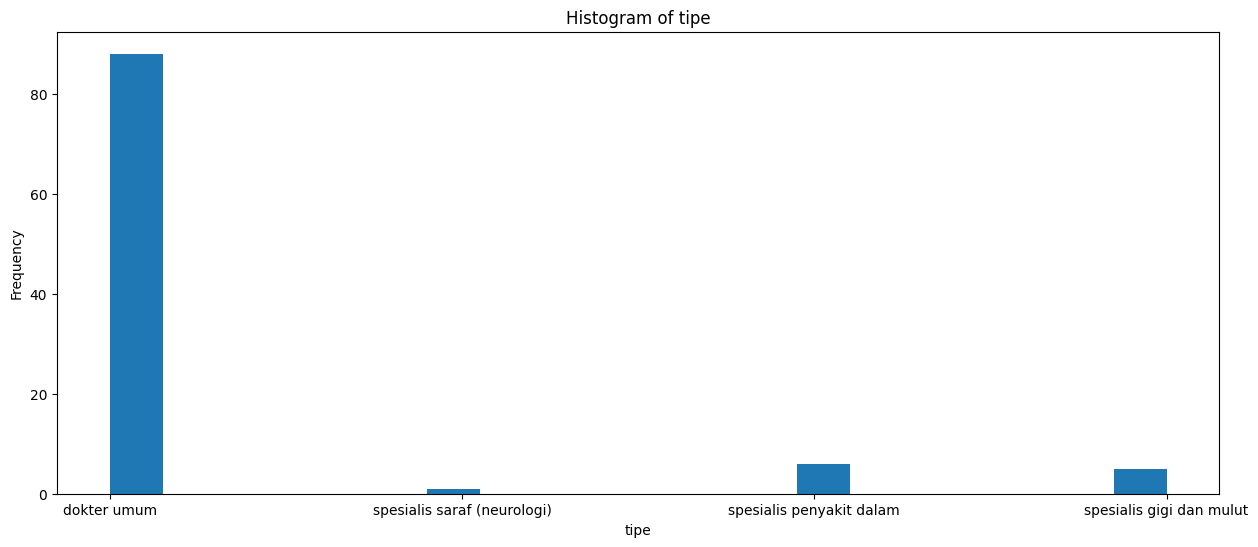

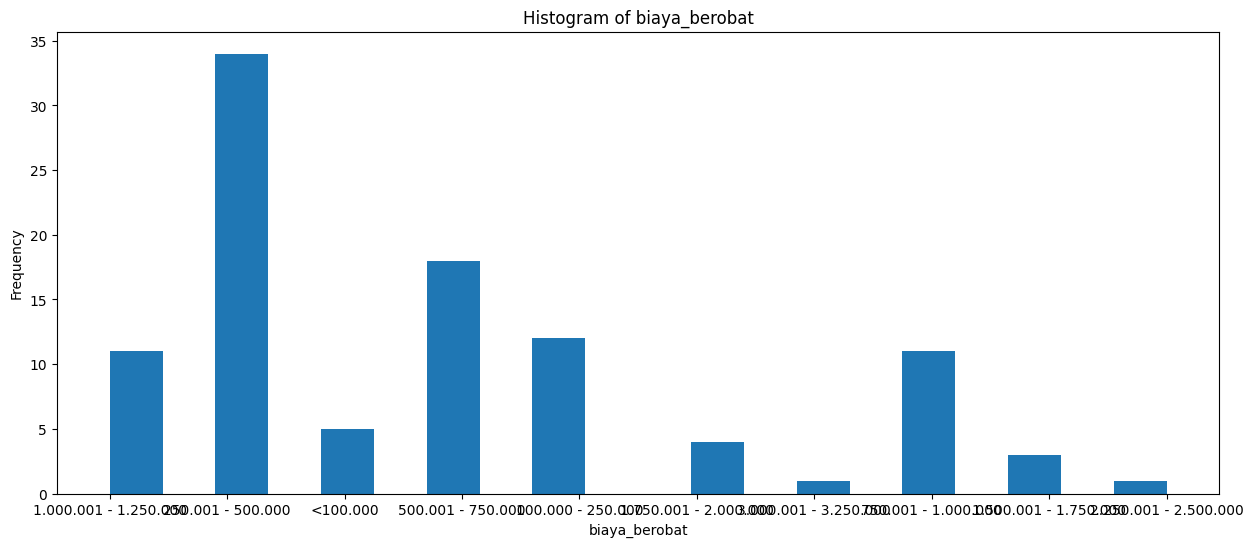

In [8]:
import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(15, 6))  # Atur lebar dan panjang diagram
  plt.hist(df[column], bins=20)  # Buat histogram dengan 20 bins
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()


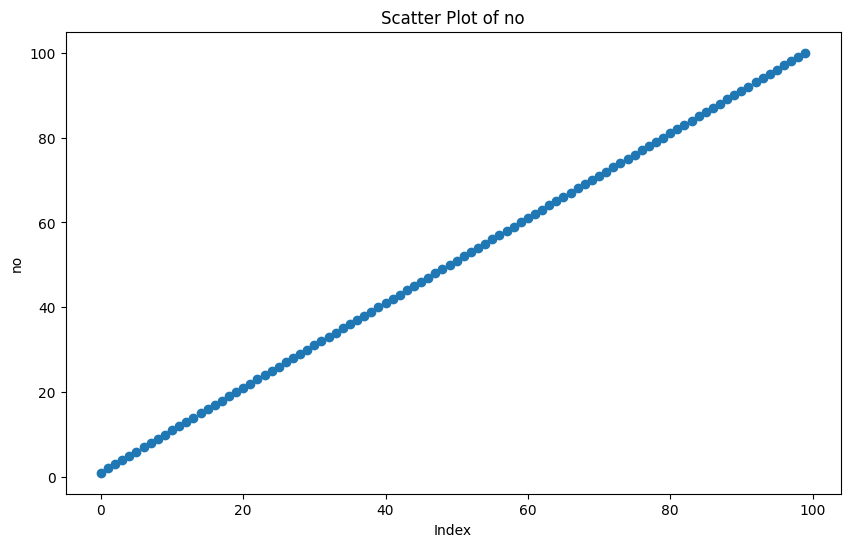

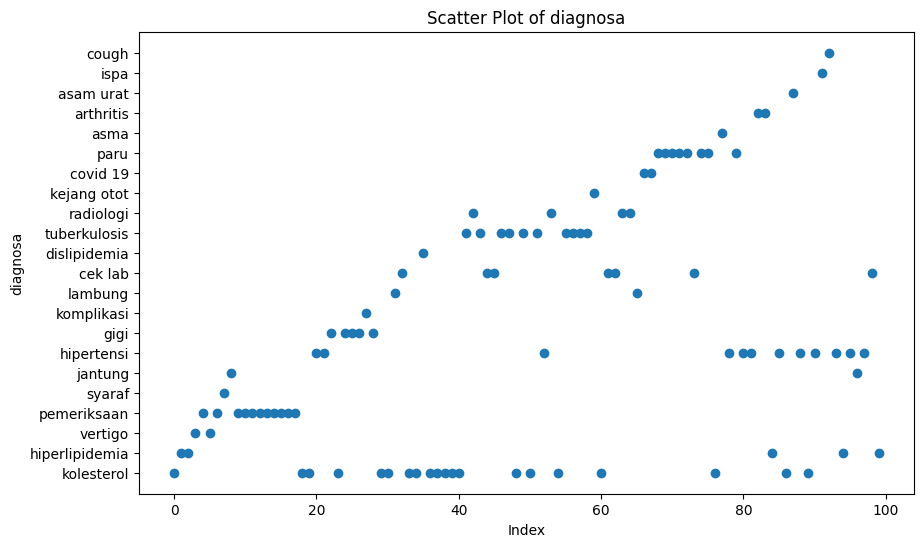

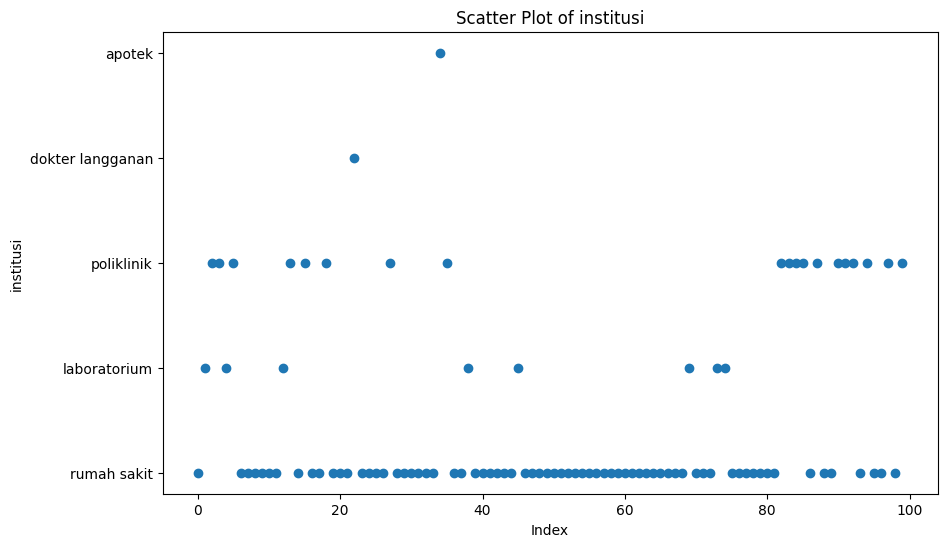

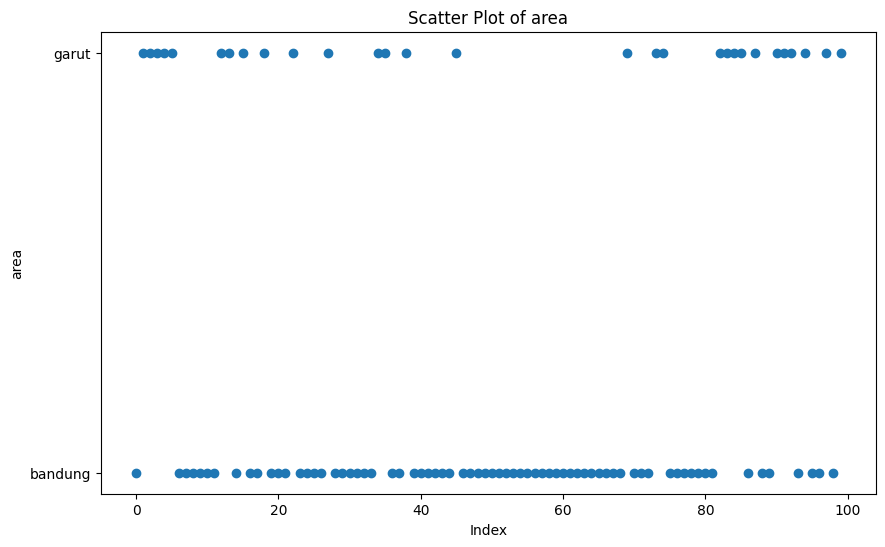

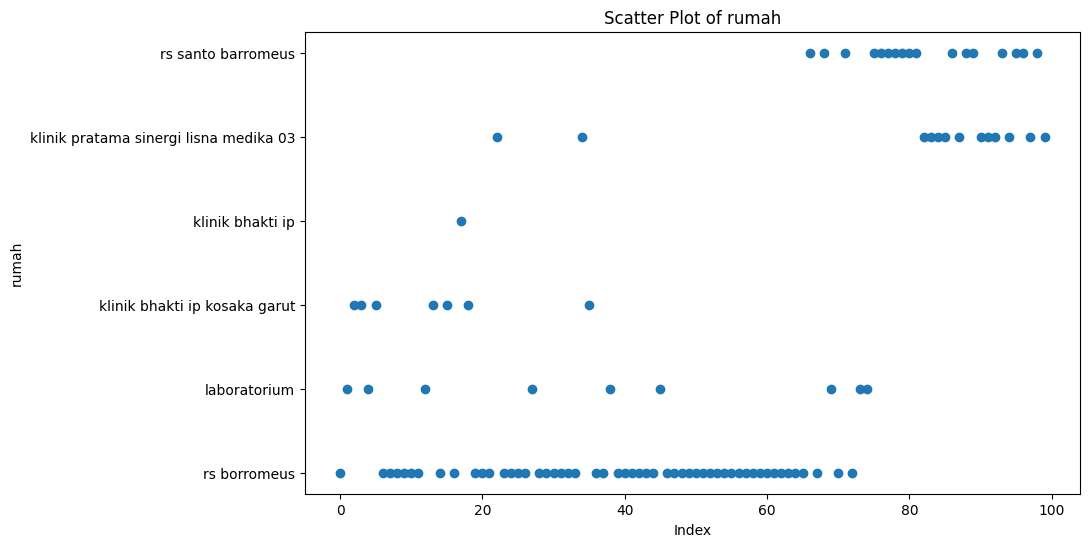

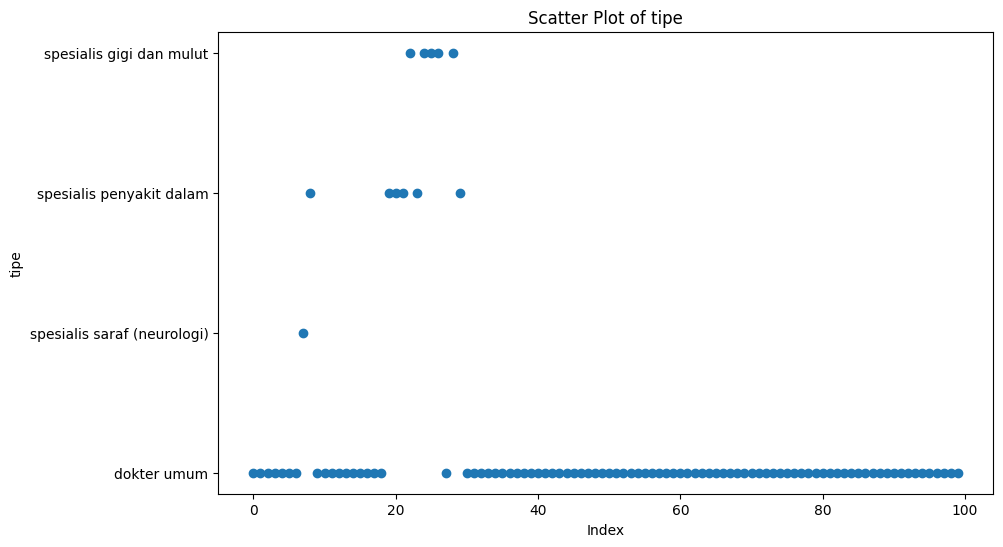

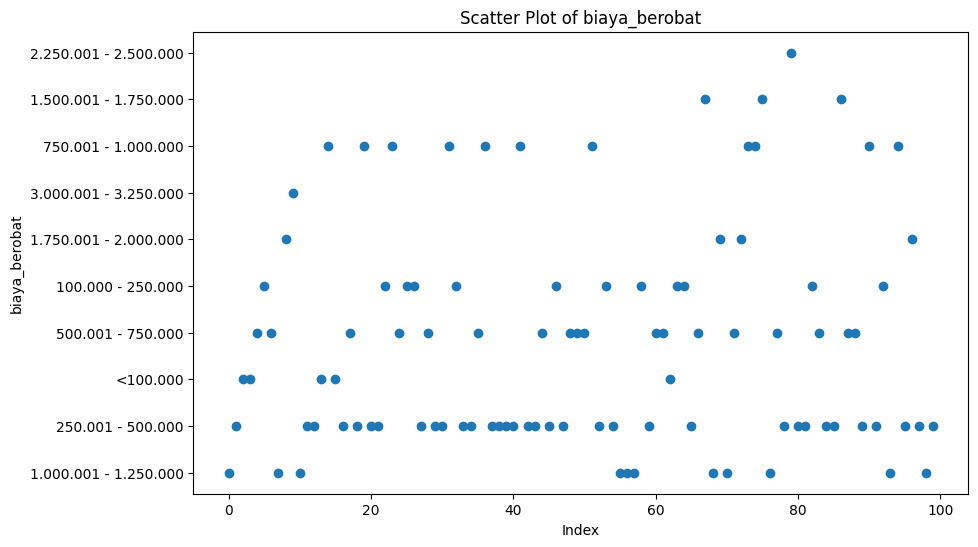

In [11]:
for column in df.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(df.index, df[column])
  plt.title(f"Scatter Plot of {column}")
  plt.xlabel("Index")
  plt.ylabel(column)
  plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat'])

In [21]:
dataolahencoding.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,kolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1.000.001 - 1.250.000,13,4,0,4,0,0
1,2,hiperlipidemia,laboratorium,garut,laboratorium,dokter umum,250.001 - 500.000,8,2,1,3,0,5
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,<100.000,8,3,1,1,0,9
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,<100.000,21,3,1,1,0,9
4,5,pemeriksaan,laboratorium,garut,laboratorium,dokter umum,500.001 - 750.000,17,2,1,3,0,7


In [22]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'biaya_berobat'], axis=1)
dataolahencoding.head()


,no,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,13,4,0,4,0,0
1,2,8,2,1,3,0,5
2,3,8,3,1,1,0,9
3,4,21,3,1,1,0,9
4,5,17,2,1,3,0,7


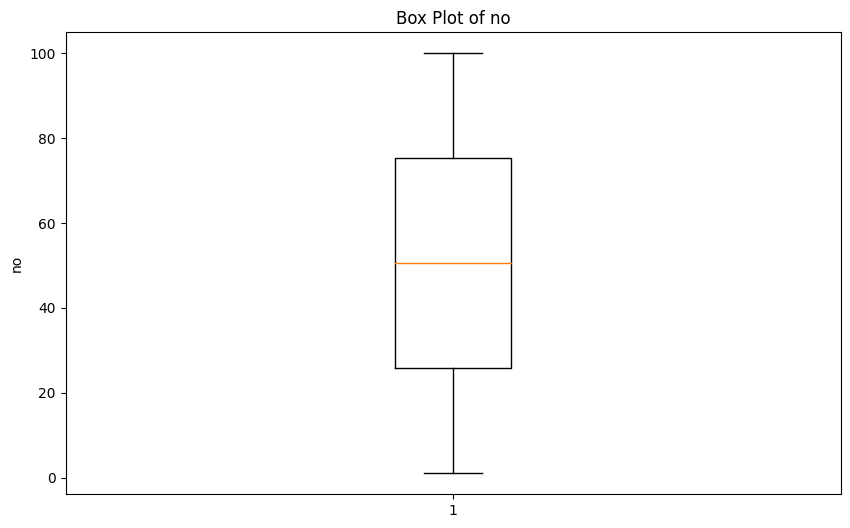

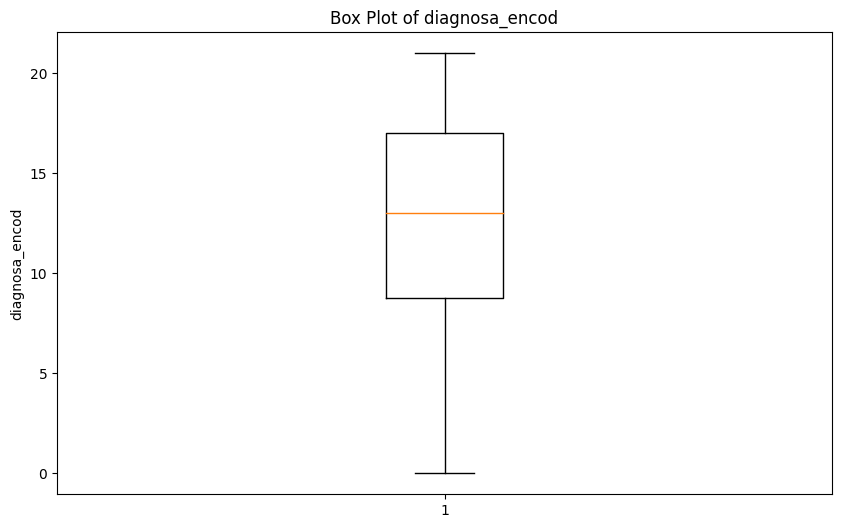

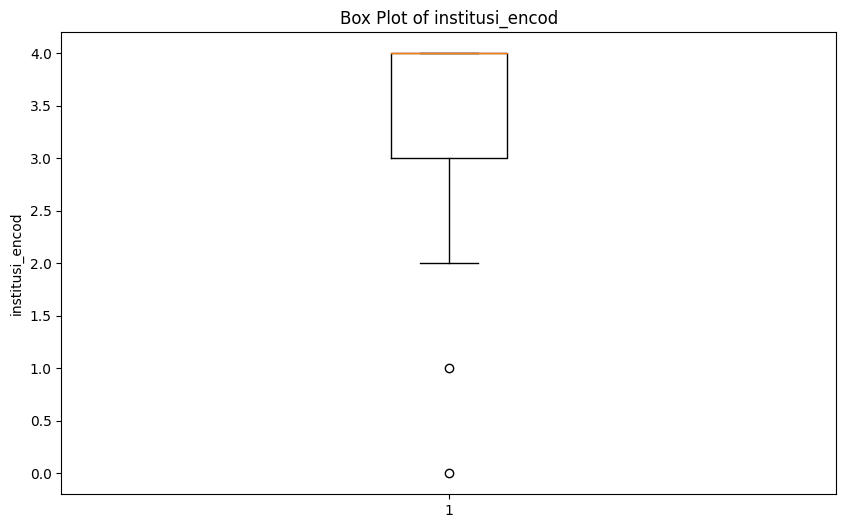

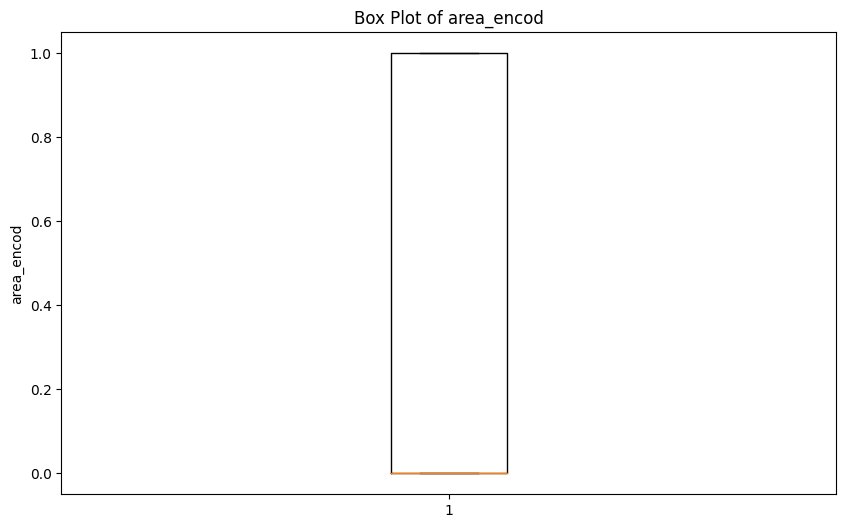

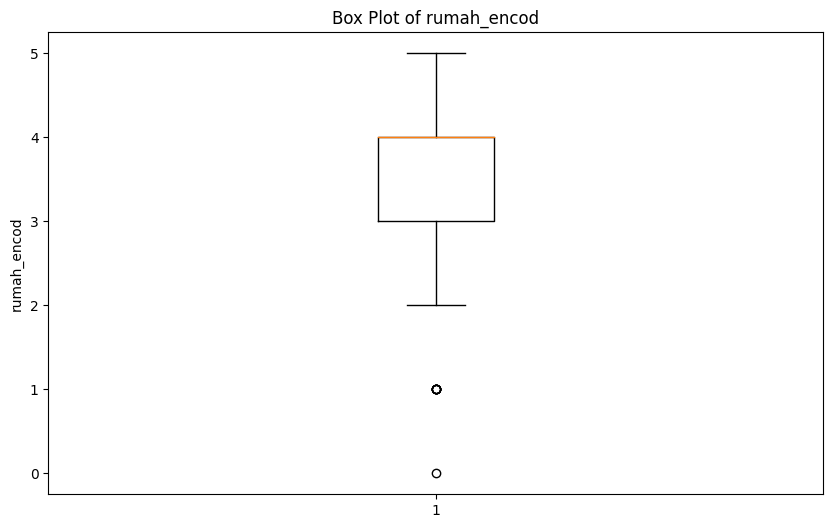

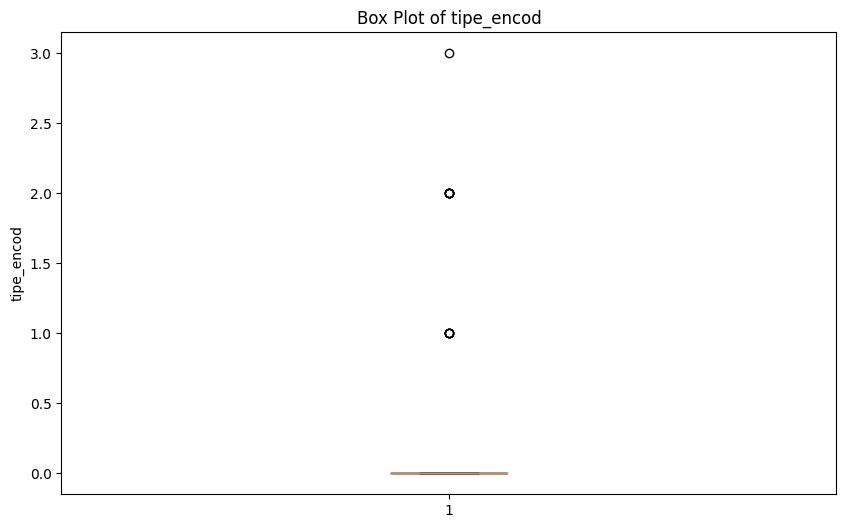

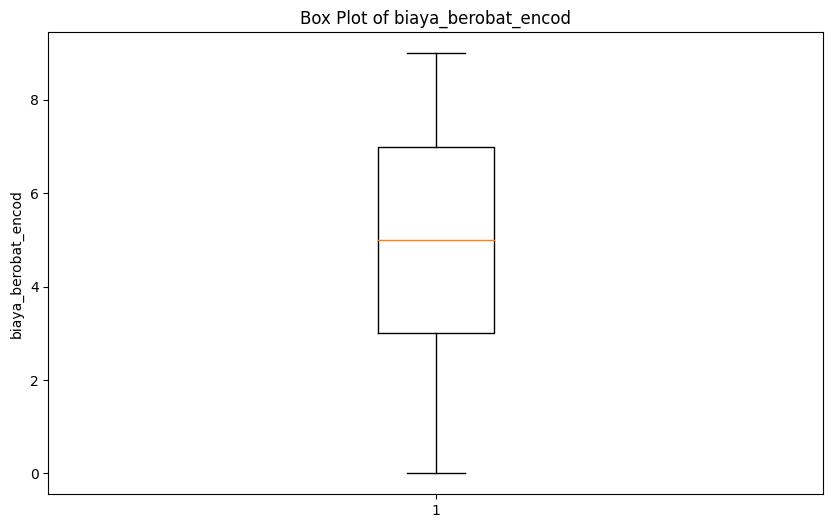

In [24]:
for column in dataolahencoding.columns:
  plt.figure(figsize=(10, 6))
  plt.boxplot(dataolahencoding[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()


In [25]:
import numpy as np

def find_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()


Kolom 'institusi_encod' memiliki outlier:
[1, 0]

Kolom 'rumah_encod' memiliki outlier:
[1, 1, 1, 1, 1, 0, 1, 1]

Kolom 'tipe_encod' memiliki outlier:
[3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2]



# **MULTIVARIATE ANALYSIS**
Menganalisis keseluruhan fitur bersama - sama

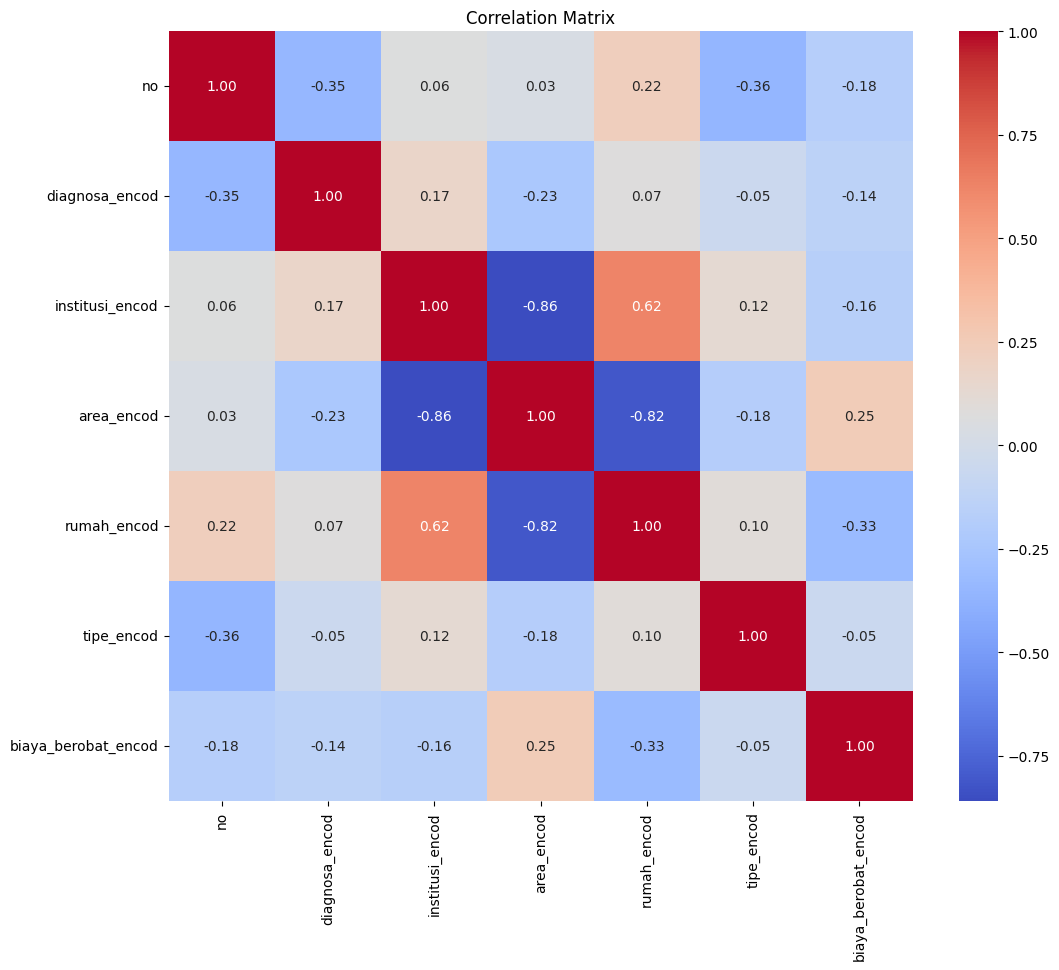

In [30]:
import seaborn as sns

correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
